<a href="https://colab.research.google.com/github/rohitjha-git/rohitjha-git-Plant-Diseases-detection/blob/test/Plant_Diseases_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

zip_file_path = "/content/drive/MyDrive/archive.zip"
extract_dir = "/content"


# Check if the zip file exists
if os.path.exists(zip_file_path):
    try:
        # Create a ZipFile object
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all contents to the specified directory
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: '{zip_file_path}' does not exist.")

Successfully extracted '/content/drive/MyDrive/archive.zip' to '/content'


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf

In [5]:
train='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

In [6]:
size=224
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train,
                      batch_size=164,
                      target_size=(size,size),
                      subset="training",
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=True)

Found 63282 images belonging to 38 classes.


In [7]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

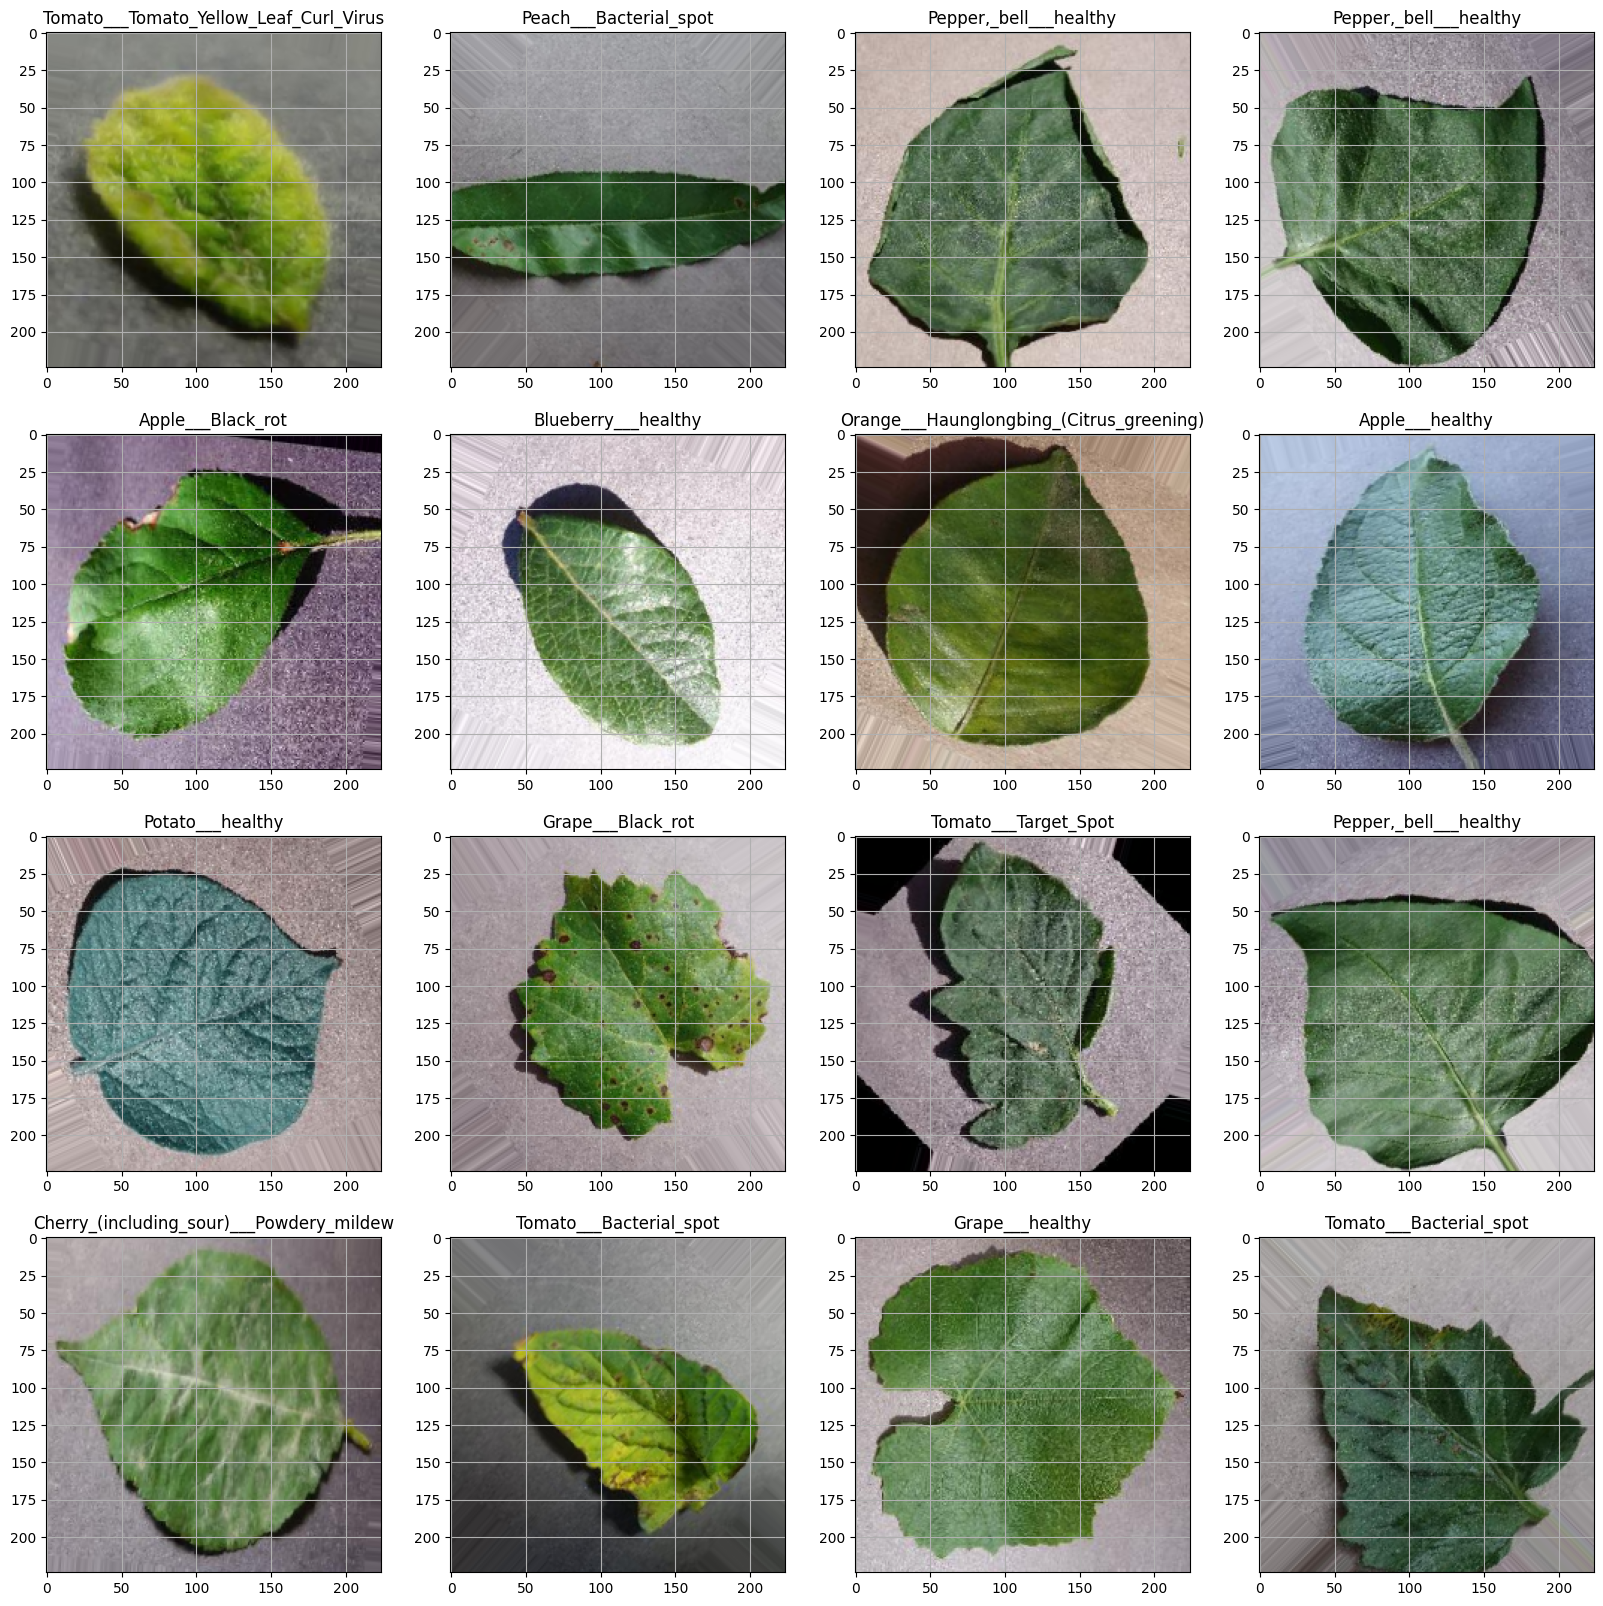

In [8]:
#let's display some images from training set

classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])   # when y is categorical
        # plt.title(classes[int(y_batch[i])])   # when y is binary or sparse
        plt.grid(None)
    # show the plot
    plt.show()
    break


In [9]:
valid='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [10]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(valid,
                      batch_size=164,
                      target_size=(224,224),
                      subset='validation',
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 1742 images belonging to 38 classes.


In [11]:
test='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224,224),
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 17572 images belonging to 38 classes.


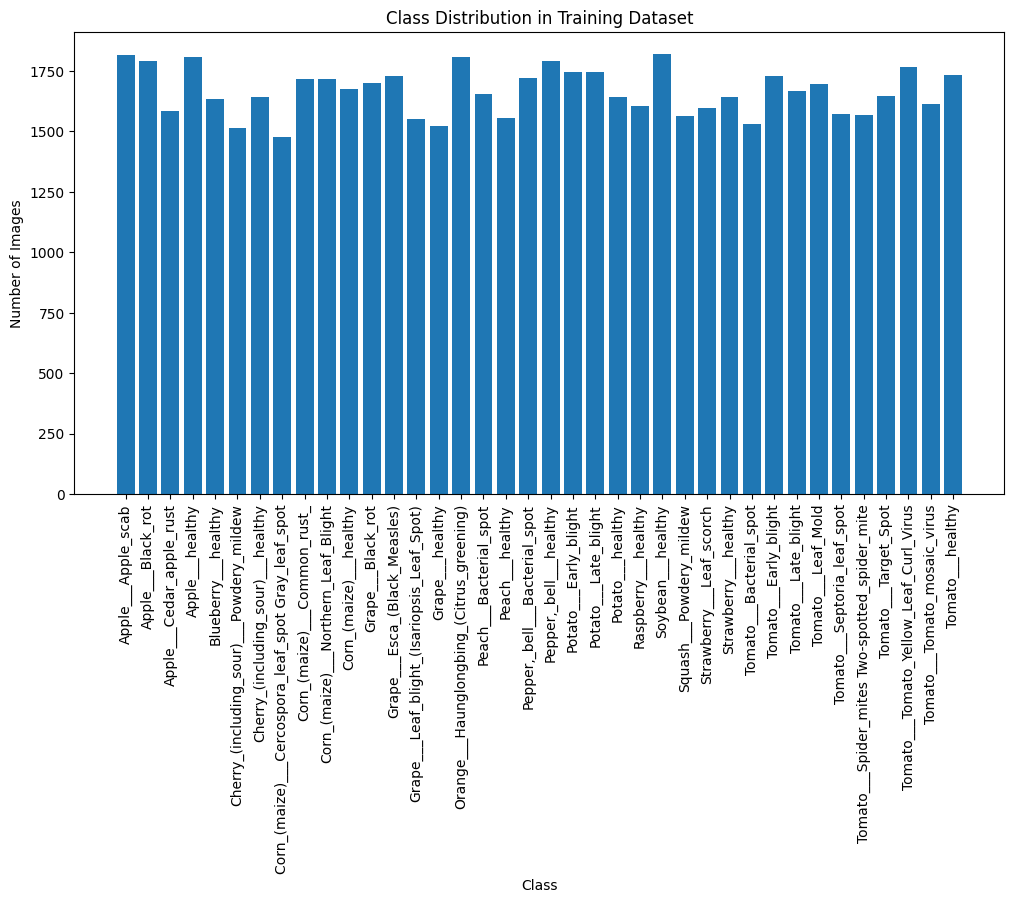

In [12]:
# Count the number of images per class in the training set
class_counts = train_generator.classes
class_labels = list(train_generator.class_indices.keys())

# Count occurrences of each class
class_distribution = pd.Series(class_counts).value_counts().sort_index()

# Display class distribution
plt.figure(figsize=(12,6))
plt.bar(class_distribution.index, class_distribution.values, tick_label=class_labels)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=90)
plt.show()

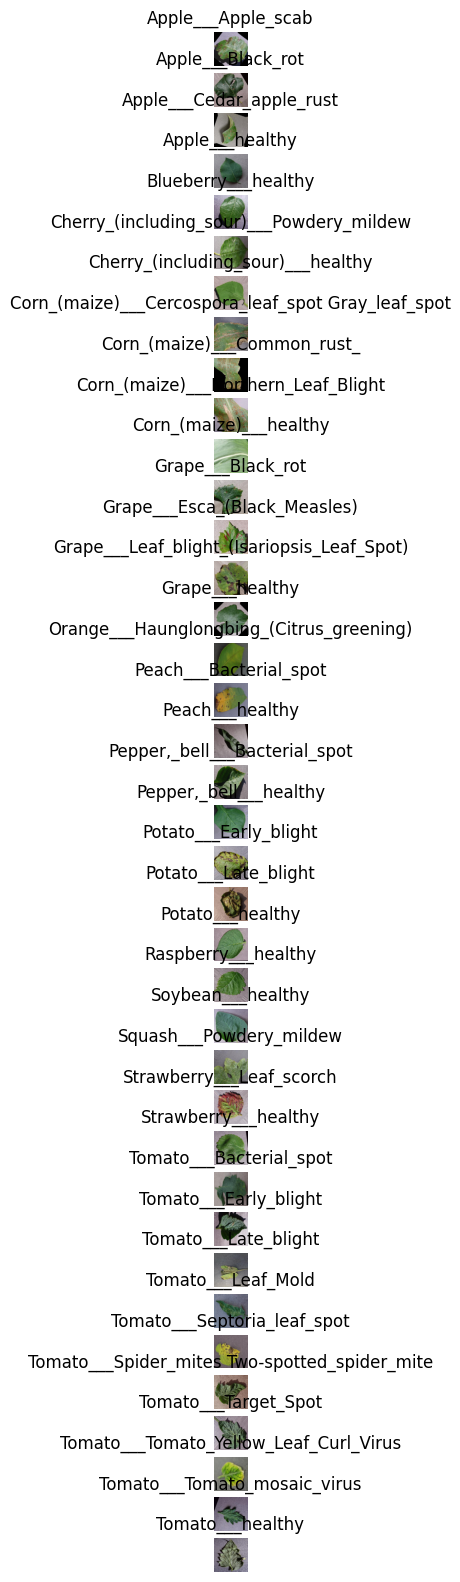

In [13]:
# Plot some example images from each class in the dataset

classes = list(train_generator.class_indices.keys())

plt.figure(figsize=(20, 20))
for i, class_name in enumerate(classes):
    for X_batch, y_batch in train_generator:
        class_idx = train_generator.class_indices[class_name]
        # Get the first image from the batch that belongs to this class
        idx = np.where(y_batch[:, class_idx] == 1)[0][0]
        img = X_batch[idx]
        # Plot the image
        plt.subplot(len(classes), 5, i * 5 + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
        break

plt.show()

In [14]:
# Check the shape of images in the training dataset
image_shapes = []
for X_batch, y_batch in train_generator:
    image_shapes.append(X_batch.shape[1:])  # Shape of images (height, width, channels)
    break  # Exit after the first batch

# Show the shape of images in the dataset
print(f"Image shape: {image_shapes[0]}")

Image shape: (224, 224, 3)


In [15]:
# Check the number of channels in the images
sample_image = X_batch[0]  # Take the first image in the batch
channels = sample_image.shape[2]
print(f"Number of color channels in images: {channels}")

Number of color channels in images: 3


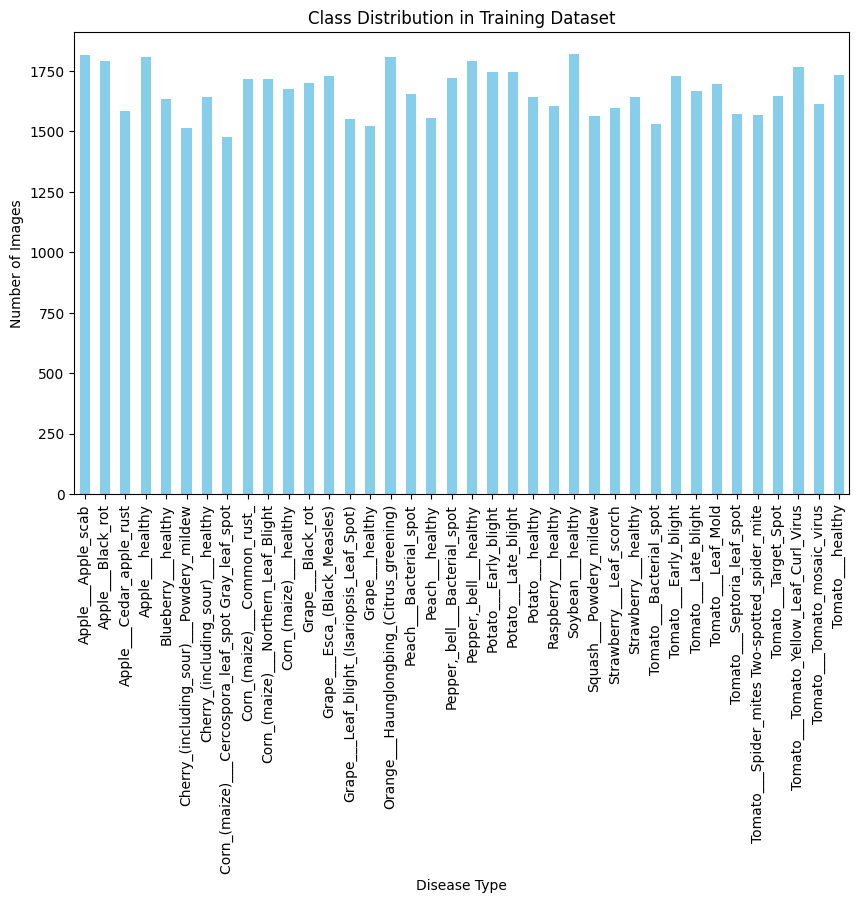

In [16]:
class_counts = pd.Series(train_generator.classes).value_counts()

# Map class indices back to their names
class_labels = {v: k for k, v in train_generator.class_indices.items()}
class_counts.index = class_counts.index.map(class_labels)

# Plot the distribution
plt.figure(figsize=(10, 6))
class_counts.sort_index().plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title("Class Distribution in Training Dataset")
plt.xlabel("Disease Type")
plt.ylabel("Number of Images")
plt.show()

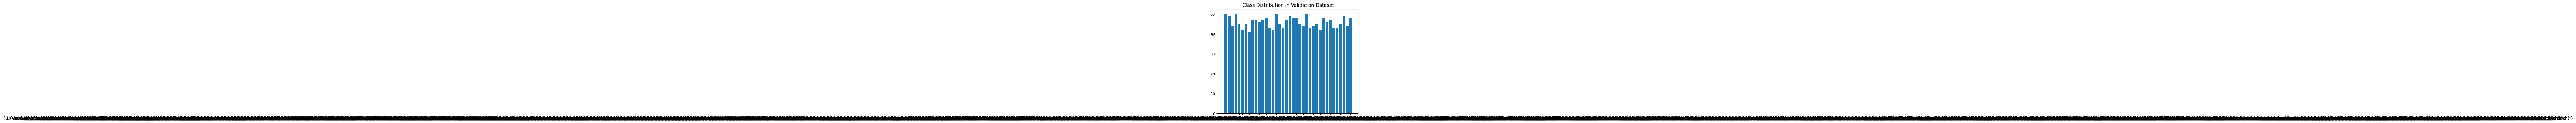

In [21]:
val_classes = valid_generator.classes
val_distribution = pd.Series(val_classes).value_counts().sort_index()
plt.bar(val_distribution.index, val_distribution.values, tick_label=class_labels)
plt.title("Class Distribution in Validation Dataset")
plt.show()

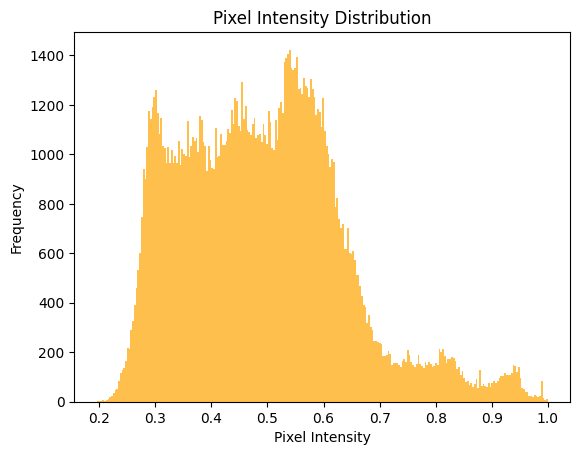

In [18]:
img = X_batch[0]  # Example image from training set
plt.hist(img.ravel(), bins=256, color='orange', alpha=0.7)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

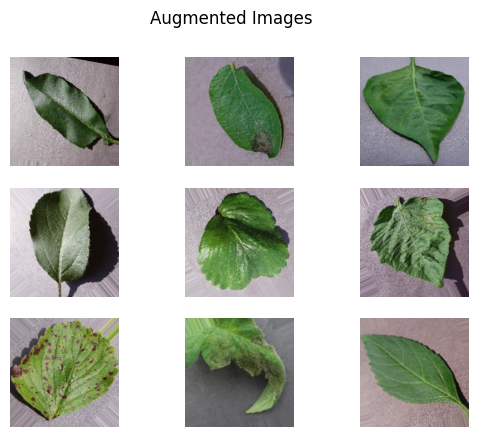

In [19]:
for X_batch, y_batch in train_generator:
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(X_batch[i])
        plt.axis('off')
    plt.suptitle("Augmented Images")
    plt.show()
    break

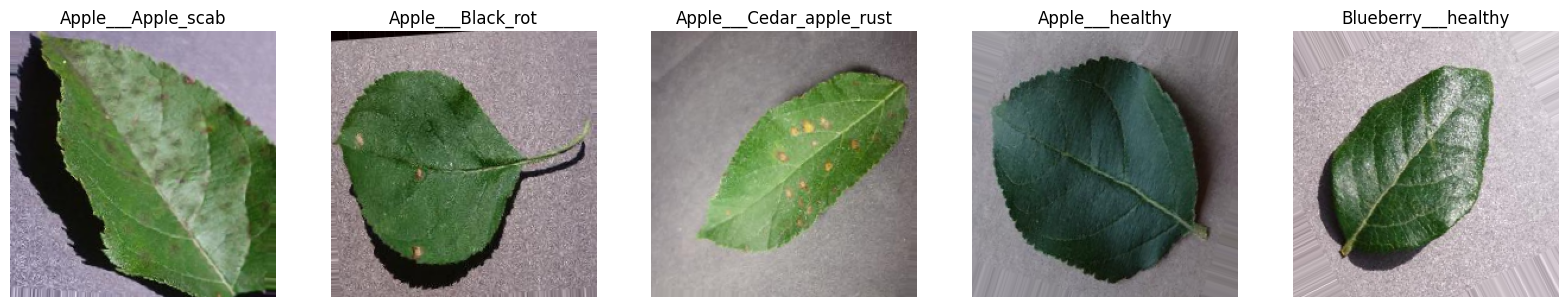

In [22]:
plt.figure(figsize=(20, 20))
for i, class_name in enumerate(classes[:5]):  # Display samples for first 5 classes
    for X_batch, y_batch in train_generator:
        class_idx = train_generator.class_indices[class_name]
        idx = np.where(y_batch[:, class_idx] == 1)[0][0]
        img = X_batch[idx]
        plt.subplot(5, 5, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
        break
plt.show()

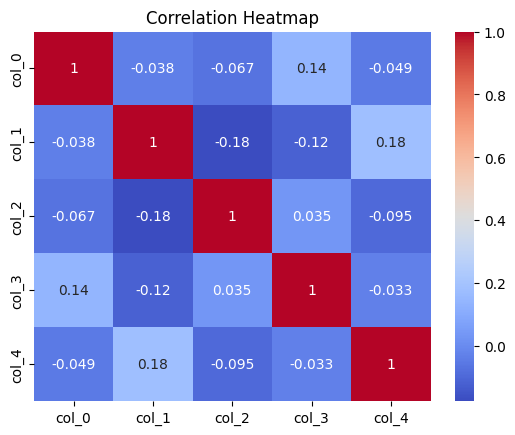

In [23]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create a sample DataFrame

num_rows = 100  # Number of rows in the DataFrame
num_cols = 5   # Number of columns in the DataFrame
data = np.random.rand(num_rows, num_cols)  # Generate random data
df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(num_cols)])  # Create DataFrame

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [24]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1  # Reserve 10% of training data for validation
).flow_from_directory(
    train,
    target_size=(224, 224),
    batch_size=32,
    subset="training",
    class_mode="categorical"
)

valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.1
).flow_from_directory(
    train,
    target_size=(224, 224),
    batch_size=32,
    subset="validation",
    class_mode="categorical"
)

Found 63282 images belonging to 38 classes.
Found 7013 images belonging to 38 classes.


In [25]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0
).flow_from_directory(
    test,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False  # Keep the order consistent for evaluation
)

Found 17572 images belonging to 38 classes.


In [26]:
print(f"Training samples: {len(train_generator.classes)}")
print(f"Validation samples: {len(valid_generator.classes)}")
print(f"Test samples: {len(test_generator.classes)}")

Training samples: 63282
Validation samples: 7013
Test samples: 17572


In [27]:
from sklearn.model_selection import train_test_split
import os
from shutil import copy
from pathlib import Path

# Define the paths
path_to_all_images = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"
train_directory_path = "/content/new plant diseases dataset(augmented)/Split/train"
test_directory_path = "/content/new plant diseases dataset(augmented)/Split/test"
valid_directory_path = "/content/new plant diseases dataset(augmented)/Split/valid"

# Ensure output directories exist
Path(train_directory_path).mkdir(parents=True, exist_ok=True)
Path(test_directory_path).mkdir(parents=True, exist_ok=True)
Path(valid_directory_path).mkdir(parents=True, exist_ok=True)

# Get all image file paths and labels
all_images = []
labels = []

for class_folder in os.listdir(path_to_all_images):
    class_path = os.path.join(path_to_all_images, class_folder)
    if os.path.isdir(class_path):  # Ensure it's a folder
        for image_file in os.listdir(class_path):
            all_images.append(os.path.join(class_path, image_file))
            labels.append(class_folder)

# Split the dataset
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, labels, test_size=0.2, stratify=labels, random_state=42
)

train_images, valid_images, train_labels, valid_labels = train_test_split(
    train_images, train_labels, test_size=0.1, stratify=train_labels, random_state=42
)

# Function to copy files to the respective directories
def copy_files(images, labels, destination_path):
    for img_path, label in zip(images, labels):
        label_dir = os.path.join(destination_path, label)
        Path(label_dir).mkdir(parents=True, exist_ok=True)
        copy(img_path, label_dir)

# Copy images to train, test, and valid directories
copy_files(train_images, train_labels, train_directory_path)
copy_files(test_images, test_labels, test_directory_path)
copy_files(valid_images, valid_labels, valid_directory_path)

print("Data successfully split and copied!")

Data successfully split and copied!


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Baseline CNN model
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer
])

baseline_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model
history = baseline_model.fit(train_generator, validation_data=valid_generator, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1978/1978 ━━━━━━━━━━━━━━━━━━━━ 5062s 3s/step - accuracy: 0.3729 - loss: 3.7558 - val_accuracy: 0.5488 - val_loss: 1.7658
Epoch 2/10
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 4900s 2s/step - accuracy: 0.7053 - loss: 0.9693 - val_accuracy: 0.7194 - val_loss: 0.9483
Epoch 3/10
1978/1978 ━━━━━━━━━━━━━━━━━━━━ 4963s 3s/step - accuracy: 0.7544 - loss: 0.8071 - val_accuracy: 0.7232 - val_loss: 1.0491
Epoch 4/10
 919/1978 ━━━━━━━━━━━━━━━━━━━━ 43:25 2s/step - accuracy: 0.7687 - loss: 0.7633

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.applications import VGG16
from sklearn.ensemble import RandomForestClassifier

# Feature extraction using VGG16
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
features = vgg.predict(train_generator)
rf_model = RandomForestClassifier()
rf_model.fit(features, train_labels)

   4/1978 ━━━━━━━━━━━━━━━━━━━━ 11:23:36 21s/step

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, features, train_labels, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())